In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy import stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, stats, t


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

/home/karvala/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/karvala/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('world_final.csv', index_col=0)

In [3]:
df.columns


Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice_i', 'lifeexpectancy_i',
       'landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k',
       'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gdp_k',
       'grosstertiaryeducationenrollment_k', 'infantmortality_k',
       'maternalmortalityratio_k', 'minimumwage_k',
       'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k',
       'unemploymentrate_k', 'urban_population_k'],
      dtype='object')

In [4]:
nombre_columnas = {'gasolineprice_i': 'gasolineprice', 'lifeexpectancy_i' : 'lifeexpectancy',
       'landarea_k' : 'landarea', 'armedforcessize_k' : 'armedforcessize', 'birthrate_k': 'birthrate', 'callingcode_k': 'callingcode', 'co2-emissions_k' : 'co2_emissions', 'cpi_k': 'cpi', 'cpichange_k':'cpichange', 'fertilityrate_k':'fertilityrate', 'gdp_k':'gdp', 'grosstertiaryeducationenrollment_k' : 'grosstertiaryeducationenrollment', 'infantmortality_k':'infantmortality','maternalmortalityratio_k' : 'maternalmortalityratio', 'minimumwage_k':'minimumwage', 'outofpockethealthexpenditure_k': 'outofpockethealthexpenditure', 'population_k' :'population', 'totaltaxrate_k':'totaltaxrate', 'unemploymentrate_k':'unemploymentrate', 'urban_population_k':'urban_population'}

In [5]:
df.rename(columns=nombre_columnas, inplace=True)

In [6]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice', 'lifeexpectancy', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'co2_emissions', 'cpi',
       'cpichange', 'fertilityrate', 'gdp', 'grosstertiaryeducationenrollment',
       'infantmortality', 'maternalmortalityratio', 'minimumwage',
       'outofpockethealthexpenditure', 'population', 'totaltaxrate',
       'unemploymentrate', 'urban_population'],
      dtype='object')

# Pair programming Estadística Inferencial
## Ejercicios estadística inferencial
1. Igual que en los ejercicios de la clase invertida, evalúa si las siguientes afirmaciones corresponden a una distribución exponencial o poisson.  
¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson?
- exponencial  
¿El número de errores en un artículo de noticias sigue una distribución exponencial o de Poisson?
- Poisson  
¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?
- exponencial  
¿El número de accidentes de tráfico en una hora en una ciudad sigue una distribución exponencial o de Poisson?
- Poisson  
¿El tiempo entre llegadas de llamadas telefónicas a una central de emergencias sigue una distribución exponencial o de Poisson?
- exponencial  
¿El número de clientes que ingresan a una tienda en una hora sigue una distribución exponencial o de Poisson?
-Poisson  
¿El tiempo entre llegadas de correos electrónicos en una bandeja de entrada sigue una distribución exponencial o de Poisson?
- exponencial  
¿El número de defectos en una línea de producción por día sigue una distribución exponencial o de Poisson?
-Poisson 
¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?
- exponencial  
¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?
- Poisson  

2. Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase invertida, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.
Intervalo de Confianza para la Esperanza de Vida 
Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.
Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [7]:
# lo primero que tenemos que hacer es calcular la estimación puntual, en este caso calcularemos la media de la duración de las llamadas
media_esperanza = df.groupby('Continent')["lifeexpectancy"].mean()

# después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
error_esperanza = stats.sem(df.groupby('Continent')["lifeexpectancy"].mean())

# definimos el nivel de confianza (95% en este caso)
nivel_confianza_esperanza = 0.95

# calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_esperanza = len(df.groupby('Continent')["lifeexpectancy"].mean()) - 1

# calculamos el valor crítico de la muestra
valor_critico_esperanza = t.ppf((1 + nivel_confianza_esperanza) / 2, df=grados_libertad_esperanza)

# calculamos el intervalo de confianza
limite_inferior_esperanza = media_esperanza - valor_critico_esperanza * error_esperanza
limite_superior_esperanza = media_esperanza + valor_critico_esperanza * error_esperanza

print("Intervalo de Confianza para la Esperanza de Vida :")
print(f"Media Muestral: {np.round(media_esperanza, 2)}")
print(f"Error Estándar: {np.round(error_esperanza, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_esperanza}")
print(f"Valor Crítico: {np.round(valor_critico_esperanza, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_esperanza, 2)}, {np.round(limite_superior_esperanza, 2)})")


Intervalo de Confianza para la Esperanza de Vida :
Media Muestral: Continent
Africa     63.70
America    74.86
Asia       69.38
Europa     79.15
Oceania    73.85
Name: lifeexpectancy, dtype: float64
Error Estándar: 2.63
Nivel de Confianza: 0.95
Valor Crítico: 2.78
Intervalo de Confianza: (Continent
Africa     56.39
America    67.55
Asia       62.08
Europa     71.85
Oceania    66.55
Name: lifeexpectancy, dtype: float64, Continent
Africa     71.00
America    82.16
Asia       76.69
Europa     86.46
Oceania    81.15
Name: lifeexpectancy, dtype: float64)


Intervalo de Confianza para el PIB
Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [8]:
gdp_continent = df.groupby('Continent')['gdp'].mean()
gdp_continent

Continent
Africa     4.711679e+10
America    8.003766e+11
Asia       4.267753e+11
Europa     4.796692e+11
Oceania    2.027466e+11
Name: gdp, dtype: float64

In [9]:
# lo primero que tenemos que hacer es calcular la estimación puntual, en este caso calcularemos la media de la duración de las llamadas
media_gdp = df.groupby('Continent')["gdp"].mean()

# después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
error_gdp = stats.sem(gdp_continent)

# definimos el nivel de confianza (90% en este caso)
nivel_confianza_gdp = 0.90

# calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_gdp = len(gdp_continent) - 1

# calculamos el valor crítico de la muestra
valor_critico_gdp = t.ppf((1 + nivel_confianza_gdp) / 2, df=grados_libertad_gdp)

# calculamos el intervalo de confianza
limite_inferior_gdp = media_gdp - valor_critico_gdp * error_gdp
limite_superior_gdp = media_gdp + valor_critico_gdp * error_gdp

print("Intervalo de Confianza para el PIB:")
print(f"Media Muestral: {np.round(media_gdp, 2)}")
print(f"Error Estándar: {np.round(error_gdp, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_gdp}")
print(f"Valor Crítico: {np.round(valor_critico_gdp, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_gdp, 2)}, {np.round(limite_superior_gdp, 2)})")


Intervalo de Confianza para el PIB:
Media Muestral: Continent
Africa     4.711679e+10
America    8.003766e+11
Asia       4.267753e+11
Europa     4.796692e+11
Oceania    2.027466e+11
Name: gdp, dtype: float64
Error Estándar: 128535157751.86
Nivel de Confianza: 0.9
Valor Crítico: 2.13
Intervalo de Confianza: (Continent
Africa    -2.269005e+11
America    5.263593e+11
Asia       1.527580e+11
Europa     2.056519e+11
Oceania   -7.127071e+10
Name: gdp, dtype: float64, Continent
Africa     3.211341e+11
America    1.074394e+12
Asia       7.007926e+11
Europa     7.536865e+11
Oceania    4.767638e+11
Name: gdp, dtype: float64)


Intervalo de Confianza para la Tasa de Natalidad
Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.

In [10]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland',
       'capital/majorcity', 'currency-code', 'forestedarea',
       'grossprimaryeducationenrollment', 'largestcity', 'officiallanguage',
       'populationlaborforceparticipation', 'taxrevenue', 'latitude',
       'longitude', 'Continent', 'gasolineprice', 'lifeexpectancy', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'co2_emissions', 'cpi',
       'cpichange', 'fertilityrate', 'gdp', 'grosstertiaryeducationenrollment',
       'infantmortality', 'maternalmortalityratio', 'minimumwage',
       'outofpockethealthexpenditure', 'population', 'totaltaxrate',
       'unemploymentrate', 'urban_population'],
      dtype='object')

In [11]:
# lo primero que tenemos que hacer es calcular la estimación puntual, en este caso calcularemos la media de la duración de las llamadas
media_natalidad = df[df['Continent'] == 'Asia']["birthrate"].mean()

# después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
error_natalidad = stats.sem(df[df['Continent'] == 'Asia']["birthrate"])

# definimos el nivel de confianza (99% en este caso)
nivel_confianza_natalidad = 0.99

# calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_natalidad = len(df[df['Continent'] == 'Asia']["birthrate"]) - 1

# calculamos el valor crítico de la muestra
valor_critico_natalidad = t.ppf((1 + nivel_confianza_natalidad) / 2, df=grados_libertad_natalidad)

# calculamos el intervalo de confianza
limite_inferior_natalidad = media_natalidad - valor_critico_natalidad * error_natalidad
limite_superior_natalidad = media_natalidad + valor_critico_natalidad * error_natalidad

print("Intervalo de Confianza para la Tasa de Natalidad en Asia:")
print(f"Media Muestral: {np.round(media_natalidad, 2)}")
print(f"Error Estándar: {np.round(error_natalidad, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_natalidad}")
print(f"Valor Crítico: {np.round(valor_critico_natalidad, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_natalidad, 2)}, {np.round(limite_superior_natalidad, 2)})")


Intervalo de Confianza para la Tasa de Natalidad en Asia:
Media Muestral: 24.74
Error Estándar: 0.98
Nivel de Confianza: 0.99
Valor Crítico: 2.63
Intervalo de Confianza: (22.16, 27.33)


Intervalo de Confianza para la Tasa de Desempleo
Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.

In [12]:
# lo primero que tenemos que hacer es calcular la estimación puntual, en este caso calcularemos la media de la duración de las llamadas
media_desempleo = df[df['Continent'] == 'Oceania']["unemploymentrate"].mean()

# después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
error_desempleo = stats.sem(df[df['Continent'] == 'Oceania']["unemploymentrate"])

# definimos el nivel de confianza (95% en este caso)
nivel_confianza_desempleo = 0.95

# calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_desempleo = len(df[df['Continent'] == 'Oceania']["unemploymentrate"]) - 1

# calculamos el valor crítico de la muestra
valor_critico_desempleo = t.ppf((1 + nivel_confianza_desempleo) / 2, df=grados_libertad_desempleo)

# calculamos el intervalo de confianza
limite_inferior_desempleo = media_desempleo - valor_critico_desempleo * error_desempleo
limite_superior_desempleo = media_desempleo + valor_critico_desempleo * error_desempleo

print("Intervalo de Confianza para la Tasa de Desempleo en Oceanía:")
print(f"Media Muestral: {np.round(media_desempleo, 2)}")
print(f"Error Estándar: {np.round(error_desempleo, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_desempleo}")
print(f"Valor Crítico: {np.round(valor_critico_desempleo, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_desempleo, 2)}, {np.round(limite_superior_desempleo, 2)})")


Intervalo de Confianza para la Tasa de Desempleo en Oceanía:
Media Muestral: 5.92
Error Estándar: 1.3
Nivel de Confianza: 0.95
Valor Crítico: 2.36
Intervalo de Confianza: (2.85, 8.99)


Intervalo de Confianza para la Tasa de Impuestos
Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.

In [13]:
# lo primero que tenemos que hacer es calcular la estimación puntual, en este caso calcularemos la media de la duración de las llamadas
media_impuestos = df[df['Continent'] == 'Africa']["totaltaxrate"].mean()

# después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
error_impuestos = stats.sem(df[df['Continent'] == 'Africa']["totaltaxrate"])

# definimos el nivel de confianza (90% en este caso)
nivel_confianza_impuestos = 0.90

# calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_impuestos = len(df[df['Continent'] == 'Africa']["totaltaxrate"]) - 1

# calculamos el valor crítico de la muestra
valor_critico_impuestos = t.ppf((1 + nivel_confianza_impuestos) / 2, df=grados_libertad_impuestos)

# calculamos el intervalo de confianza
limite_inferior_impuestos = media_impuestos - valor_critico_impuestos * error_impuestos
limite_superior_impuestos = media_impuestos + valor_critico_impuestos * error_impuestos

print("Intervalo de Confianza para la Tasa de Impuestos en África:")
print(f"Media Muestral: {np.round(media_impuestos, 2)}")
print(f"Error Estándar: {np.round(error_impuestos, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_impuestos}")
print(f"Valor Crítico: {np.round(valor_critico_impuestos, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_impuestos, 2)}, {np.round(limite_superior_impuestos, 2)})")


Intervalo de Confianza para la Tasa de Impuestos en África:
Media Muestral: 45.67
Error Estándar: 16.07
Nivel de Confianza: 0.9
Valor Crítico: 1.8
Intervalo de Confianza: (16.81, 74.54)


3. Ejercicios prueba de hipótesis: Hasta ahora en la lección y en los ejercicios de la clase invertida os
hemos propuesto un contexto y unas hipótesis para entender que es la prueba de hipótesis. Ahora es
tu turno, tienes que pensar en 2 hipótesis que quieras aceptar o rechazar usando una prueba de
hipótesis en base a los datos que tenemos.

In [14]:
df.head()

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice,lifeexpectancy,landarea,armedforcessize,birthrate,callingcode,co2_emissions,cpi,cpichange,fertilityrate,gdp,grosstertiaryeducationenrollment,infantmortality,maternalmortalityratio,minimumwage,outofpockethealthexpenditure,population,totaltaxrate,unemploymentrate,urban_population
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


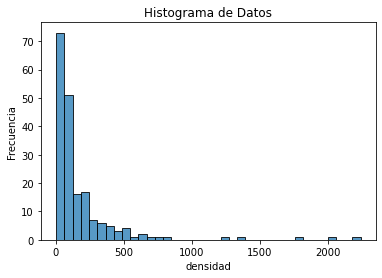

In [15]:
densidad = df[df['density'].between(0,5000)]['density']

# Crear un histograma para visualizar la distribución
sns.histplot(densidad)

# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('densidad')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia');

# como podemos ver los datos generados tienen forma de campana de Gaus, por lo que podemos decir que es una distribución normal. 

In [ ]:
# Realizar una prueba de normalidad (usando la prueba de Kolmogorov) para comprobar si la densidad es exponencial
p_value = kstest(densidad, "expon").pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución exponencial (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución exponencial (p-value =", p_value, ")")

In [36]:
col_num = ['agriculturalland', 'taxrevenue', 'gasolineprice',  'lifeexpectancy', 'landarea', 'birthrate',
        'cpi','fertilityrate', 'gdp', 'infantmortality', 'maternalmortalityratio', 'minimumwage', 'population', 'totaltaxrate', 'unemploymentrate', 'urban_population']
len(col_num)

16

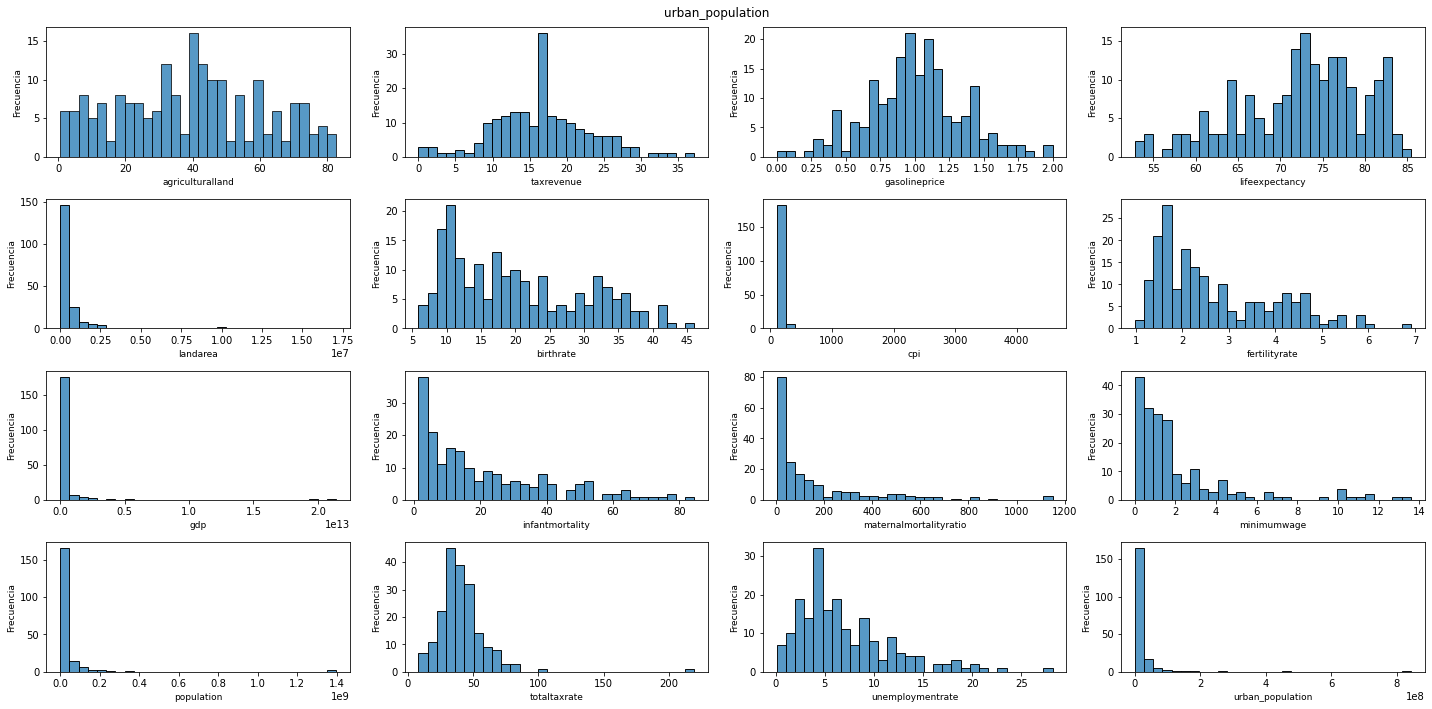

In [42]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 10))

axes = axes.flat

for indice, col in enumerate(list(col_num)):
    sns.histplot(data = df[col], ax = axes[indice], bins=30)
    
    plt.suptitle(col)    

    axes[indice].set_xlabel(col, fontsize = 9)
    axes[indice].set_ylabel("Frecuencia",  fontsize = 9)
    plt.tight_layout();

In [43]:
# Realizar una prueba de normalidad (usando la prueba de Shapiro-Wilk) para el precio de gasolina
# H0: distribución normal
# H1: disrtibución NO normal
 
p_value = shapiro(df['gasolineprice']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos se ajustan a una distribución normal (p-value = 0.5713980793952942 )


In [44]:
df.to_csv('world_final.csv')